In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

In [45]:
df = pd.read_csv('Gas_Sensors_Measurements.csv')

In [46]:
df.head()

,Serial Number,MQ2,MQ3,MQ5,MQ6,MQ7,MQ8,MQ135,Gas,Corresponding Image Name
0,0,555,515,377,338,666,451,416,NoGas,0_NoGas
1,1,555,516,377,339,666,451,416,NoGas,1_NoGas
2,2,556,517,376,337,666,451,416,NoGas,2_NoGas
3,3,556,516,376,336,665,451,416,NoGas,3_NoGas
4,4,556,516,376,337,665,451,416,NoGas,4_NoGas


In [47]:
df.tail()

,Serial Number,MQ2,MQ3,MQ5,MQ6,MQ7,MQ8,MQ135,Gas,Corresponding Image Name
6395,1595,658,445,455,414,491,321,436,Mixture,1595_Mixture
6396,1596,650,444,451,411,486,317,431,Mixture,1596_Mixture
6397,1597,630,443,446,407,474,312,429,Mixture,1597_Mixture
6398,1598,632,443,444,405,471,309,430,Mixture,1598_Mixture
6399,1599,633,442,442,402,468,306,434,Mixture,1599_Mixture


In [48]:
df.shape

(6400, 10)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Serial Number             6400 non-null   int64 
 1   MQ2                       6400 non-null   int64 
 2   MQ3                       6400 non-null   int64 
 3   MQ5                       6400 non-null   int64 
 4   MQ6                       6400 non-null   int64 
 5   MQ7                       6400 non-null   int64 
 6   MQ8                       6400 non-null   int64 
 7   MQ135                     6400 non-null   int64 
 8   Gas                       6400 non-null   object
 9   Corresponding Image Name  6400 non-null   object
dtypes: int64(8), object(2)
memory usage: 500.1+ KB


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial Number,6400.0,799.500000,461.916214,0.0,399.75,799.5,1199.25,1599.0
MQ2,6400.0,677.593438,92.913955,502.0,591.00,701.0,756.00,824.0
MQ3,6400.0,462.024688,70.284038,337.0,405.00,486.0,529.00,543.0
MQ5,6400.0,404.579063,55.672249,291.0,366.00,400.0,443.00,596.0
MQ6,6400.0,399.758750,45.091353,311.0,366.00,393.0,426.00,524.0
MQ7,6400.0,565.952031,83.133693,361.0,524.00,576.0,629.00,796.0
MQ8,6400.0,542.473750,151.020217,220.0,447.00,576.0,642.00,794.0
MQ135,6400.0,416.727031,76.681407,275.0,354.00,437.0,473.00,589.0


In [51]:
def data_profiling(df):
    data_profile = []
    columns = df.columns
    for col in columns:
        dtype = df[col].dtypes
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        duplicates = df[col].duplicated().sum()
        data_profile.append([col,dtype,nunique,null,duplicates])
    data_profile_finding = pd.DataFrame(data_profile)
    data_profile_finding.columns = ['column','dtype','nunique','null','duplicates']
    return data_profile_finding

In [52]:
data_profiling(df)

,column,dtype,nunique,null,duplicates
0,Serial Number,int64,1600,0,4800
1,MQ2,int64,322,0,6078
2,MQ3,int64,152,0,6248
3,MQ5,int64,263,0,6137
4,MQ6,int64,204,0,6196
5,MQ7,int64,351,0,6049
6,MQ8,int64,557,0,5843
7,MQ135,int64,314,0,6086
8,Gas,object,4,0,6396
9,Corresponding Image Name,object,6400,0,0


In [53]:
df.isnull().sum()

Serial Number               0
MQ2                         0
MQ3                         0
MQ5                         0
MQ6                         0
MQ7                         0
MQ8                         0
MQ135                       0
Gas                         0
Corresponding Image Name    0
dtype: int64

In [54]:
df.isna().sum()

Serial Number               0
MQ2                         0
MQ3                         0
MQ5                         0
MQ6                         0
MQ7                         0
MQ8                         0
MQ135                       0
Gas                         0
Corresponding Image Name    0
dtype: int64

In [55]:
for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())
    print('**' * 10)

Serial Number
[   0    1    2 ... 1597 1598 1599]
********************
MQ2
[555 556 557 558 559 560 561 562 563 564 565 566 658 657 655 652 653 651
 650 649 647 645 644 642 641 640 693 690 689 686 685 683 681 679 678 677
 676 674 673 672 670 669 666 664 663 662 661 660 654 709 705 703 699 697
 696 695 694 691 692 700 702 687 688 684 680 675 763 773 738 728 725 724
 721 718 716 715 713 712 708 706 704 701 698 768 774 778 764 760 758 755
 757 756 750 748 745 744 746 740 735 734 732 730 726 722 723 719 720 717
 714 759 772 779 782 784 769 767 766 752 749 751 747 743 741 739 742 733
 731 776 777 775 762 754 753 736 780 770 761 737 781 727 789 792 785 783
 786 787 791 729 711 771 788 790 793 794 765 795 797 796 798 803 800 799
 802 801 804 809 805 592 811 816 817 821 824 822 820 819 818 813 814 808
 707 710 682 668 665 638 637 636 634 633 632 631 629 630 628 627 625 624
 648 646 639 667 807 810 812 815 806 518 519 522 523 524 525 530 615 605
 595 588 581 575 571 567 553 550 548 546 543 541 

In [56]:
for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].value_counts())
    print('**' * 10)

Serial Number
Serial Number
0       4
1063    4
1073    4
1072    4
1071    4
       ..
530     4
529     4
528     4
527     4
1599    4
Name: count, Length: 1600, dtype: int64
********************
MQ2
MQ2
738    64
739    57
740    56
793    53
794    53
       ..
822     1
818     1
824     1
821     1
820     1
Name: count, Length: 322, dtype: int64
********************
MQ3
MQ3
530    429
529    398
531    342
528    281
532    221
      ... 
338      1
460      1
543      1
337      1
512      1
Name: count, Length: 152, dtype: int64
********************
MQ5
MQ5
406    79
409    70
407    63
410    63
404    60
       ..
579     1
565     1
559     1
541     1
547     1
Name: count, Length: 263, dtype: int64
********************
MQ6
MQ6
375    97
393    91
397    81
391    75
367    74
       ..
515     2
521     2
318     1
323     1
315     1
Name: count, Length: 204, dtype: int64
********************
MQ7
MQ7
576    152
575    133
574    132
572    114
581    101
      ... 
796 

In [57]:
numeric_features = [i for i in df.columns if df[i].dtype!='O']
categorical_features = [i for i in df.columns if df[i].dtype=='O']

<Axes: xlabel='Gas', ylabel='count'>

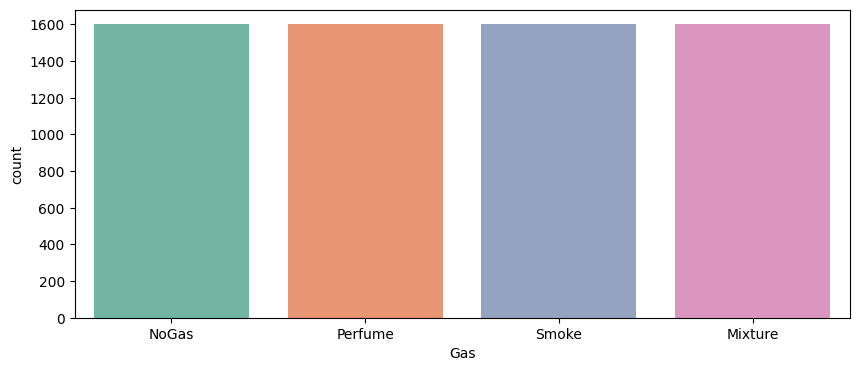

In [58]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='Gas',palette='Set2')

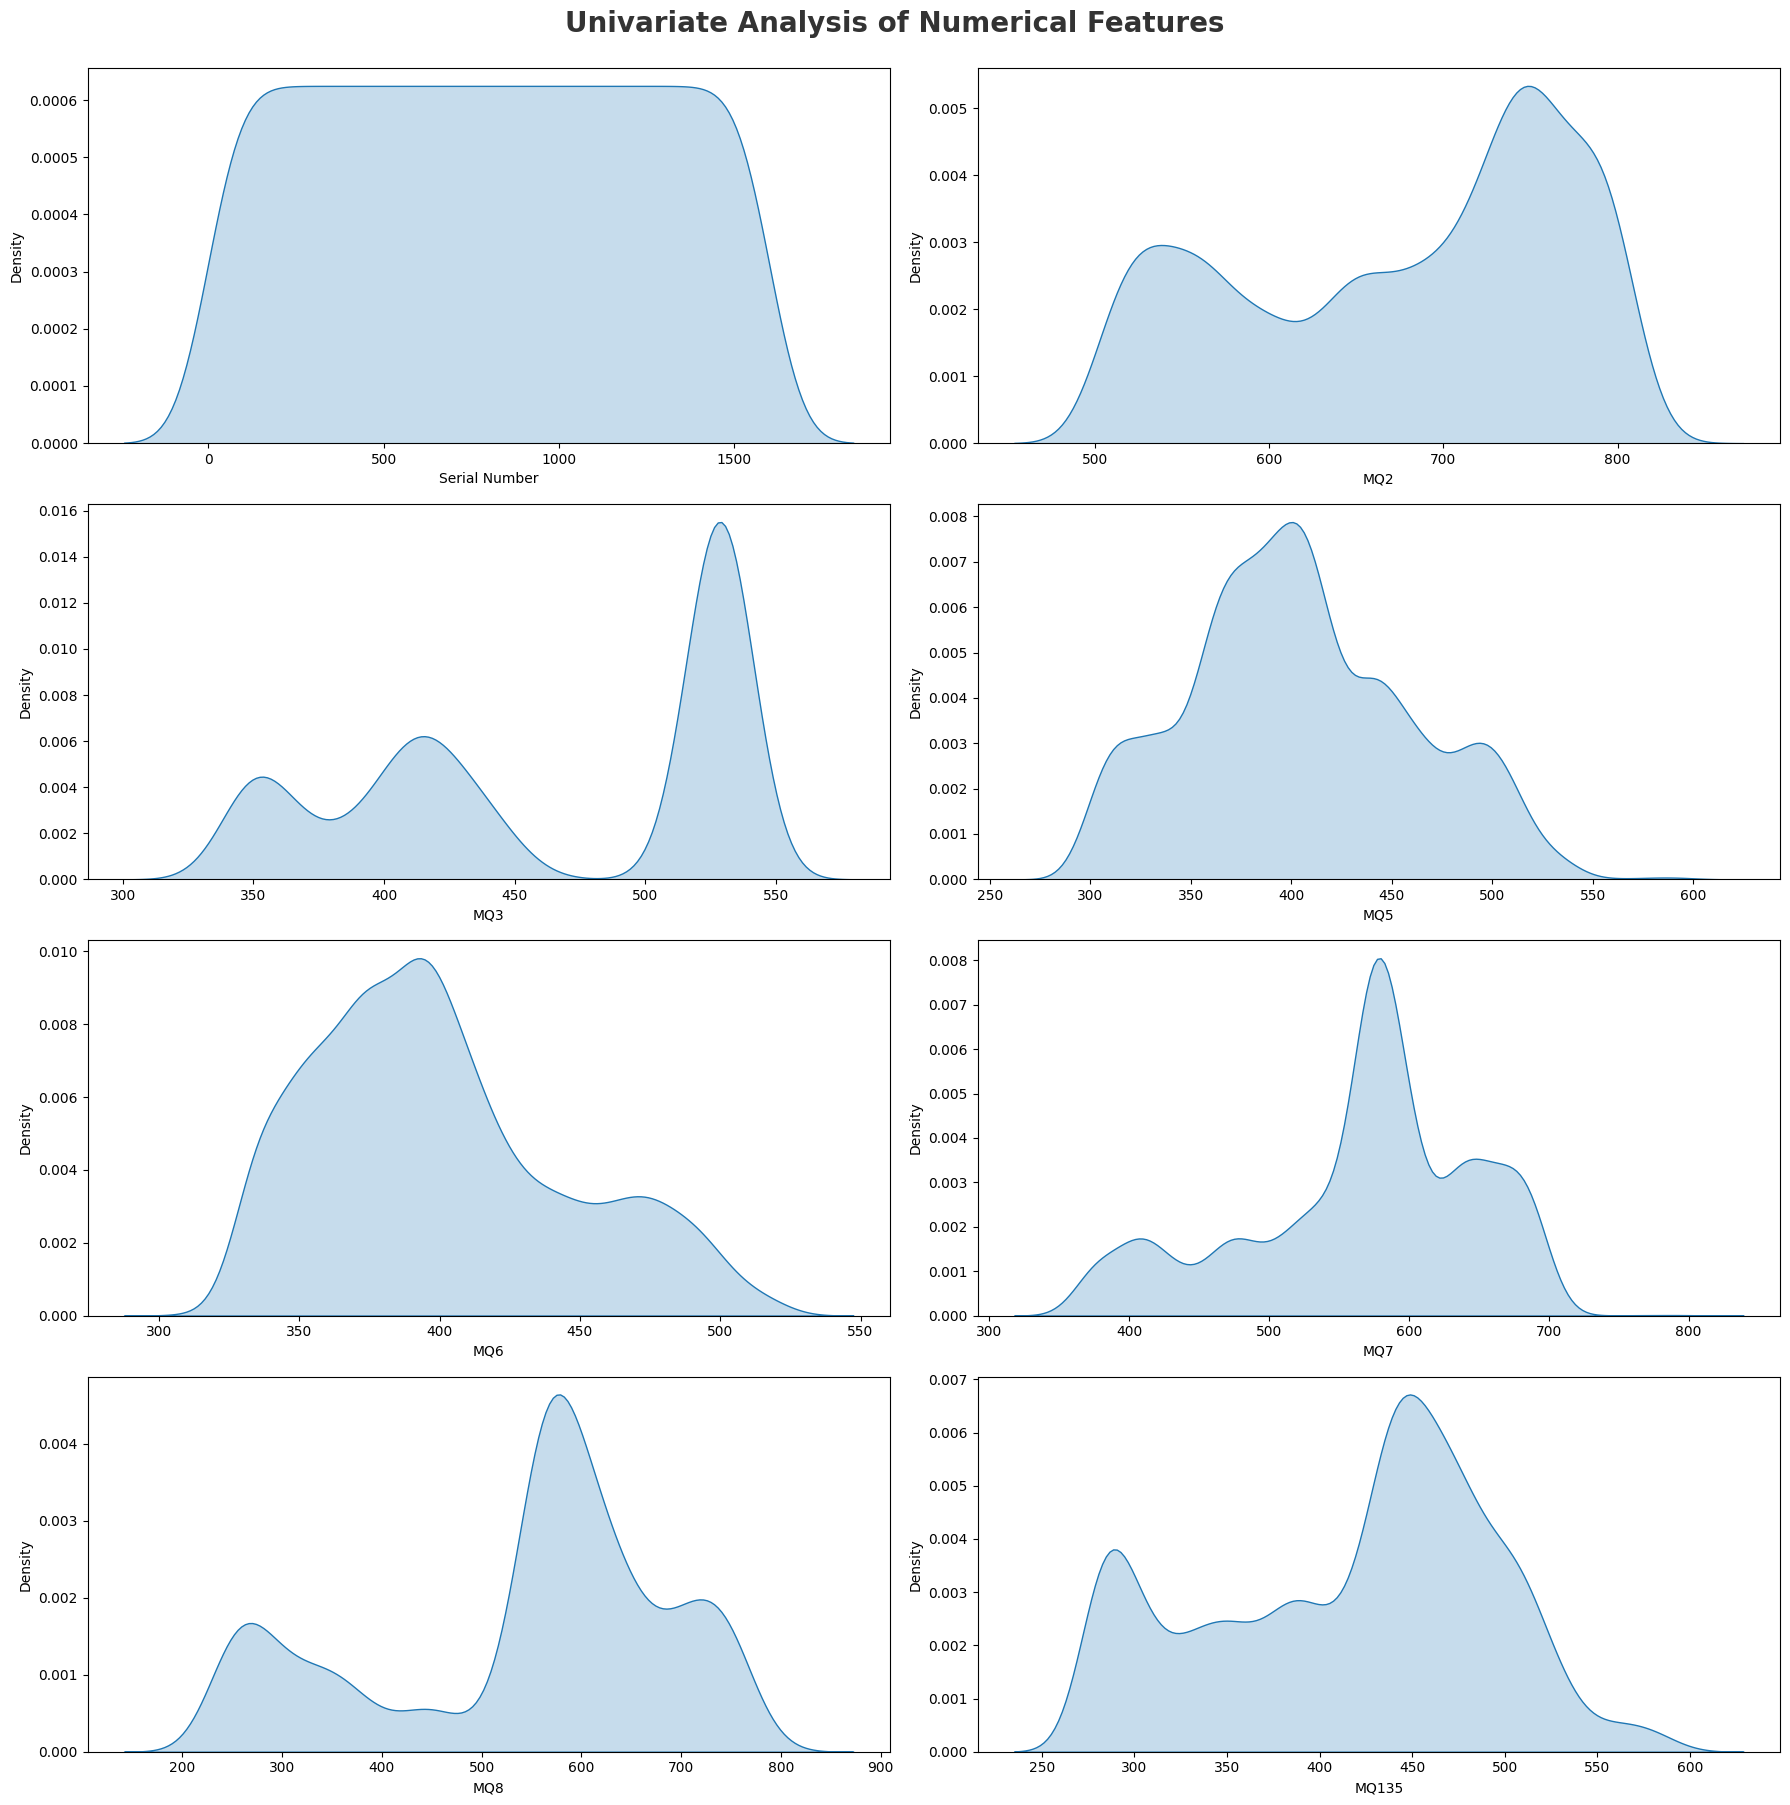

In [59]:
plt.figure(figsize=(18,18))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True,data=df)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [60]:
df.columns

Index(['Serial Number', 'MQ2', 'MQ3', 'MQ5', 'MQ6', 'MQ7', 'MQ8', 'MQ135',
       'Gas', 'Corresponding Image Name'],
      dtype='object')

In [61]:
df = df.drop([
            'Serial Number',
            'Corresponding Image Name',
            ],axis=1)

In [62]:
df.head()

,MQ2,MQ3,MQ5,MQ6,MQ7,MQ8,MQ135,Gas
0,555,515,377,338,666,451,416,NoGas
1,555,516,377,339,666,451,416,NoGas
2,556,517,376,337,666,451,416,NoGas
3,556,516,376,336,665,451,416,NoGas
4,556,516,376,337,665,451,416,NoGas


In [63]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [64]:
print(X.shape)

(6400, 7)


In [65]:
print(y.shape)

(6400,)


In [66]:
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[1 1 1 ... 0 0 0]


In [67]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=1)

In [68]:
print(X_train.shape)

(4480, 7)


In [69]:
print(X_test.shape)

(1920, 7)


In [70]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Random Forest Accuracy: 0.9697916666666667


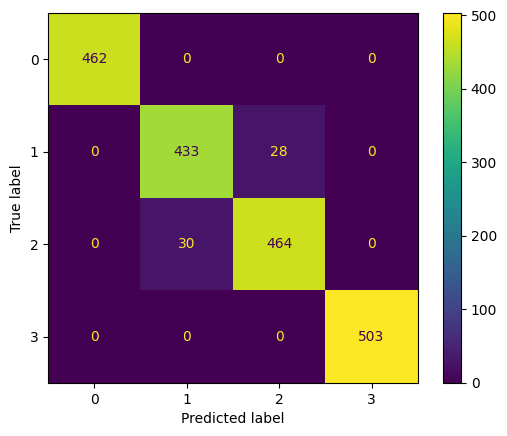

In [71]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
ConfusionMatrixDisplay.from_predictions(y_test, rf_preds)
plt.show()

Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.63      0.70      0.66       461
           2       0.69      0.61      0.65       494
           3       1.00      1.00      1.00       503

    accuracy                           0.83      1920
   macro avg       0.83      0.83      0.83      1920
weighted avg       0.83      0.83      0.83      1920



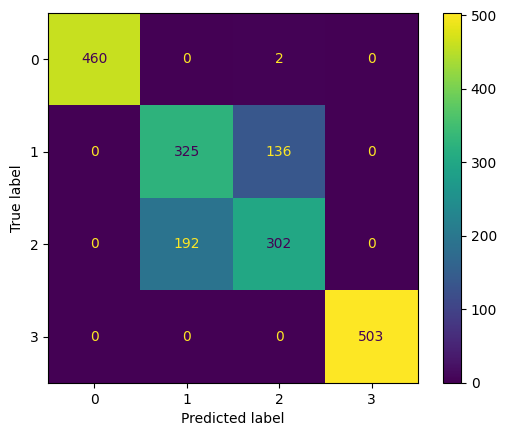

In [72]:
lr = LogisticRegression(solver="newton-cg", multi_class="multinomial", max_iter=500, n_jobs=-1)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, lr_preds))
ConfusionMatrixDisplay.from_predictions(y_test, lr_preds)
plt.show()

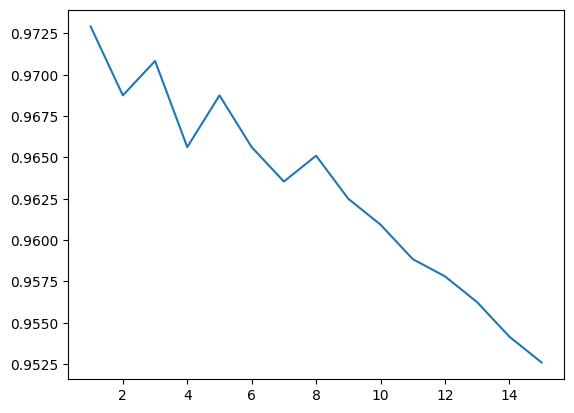

KNN Accuracy: 0.9708333333333333


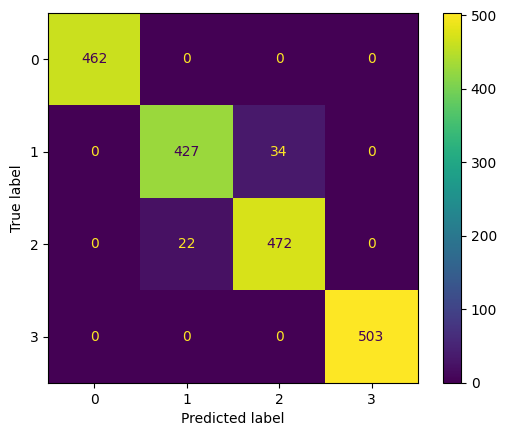

In [73]:
scores = [accuracy_score(y_test, KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train).predict(X_test)) for i in range(1, 16)]
plt.plot(range(1, 16), scores)
plt.show()

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train, y_train)
kn_preds = kn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, kn_preds))
ConfusionMatrixDisplay.from_predictions(y_test, kn_preds)
plt.show()

SVM Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.83      0.80      0.81       461
           2       0.82      0.85      0.83       494
           3       1.00      1.00      1.00       503

    accuracy                           0.91      1920
   macro avg       0.91      0.91      0.91      1920
weighted avg       0.91      0.91      0.91      1920



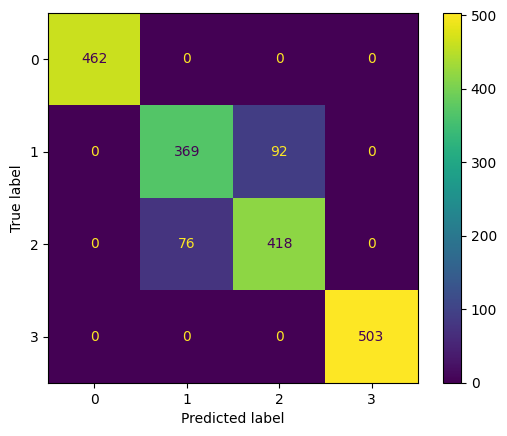

In [74]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
               {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)
final_model = svm_model.best_estimator_
svm_pred = final_model.predict(X_test)
print("SVM Report:\n", classification_report(y_test, svm_pred))
ConfusionMatrixDisplay.from_predictions(y_test, svm_pred)
plt.show()

AdaBoost Accuracy: 0.48072916666666665


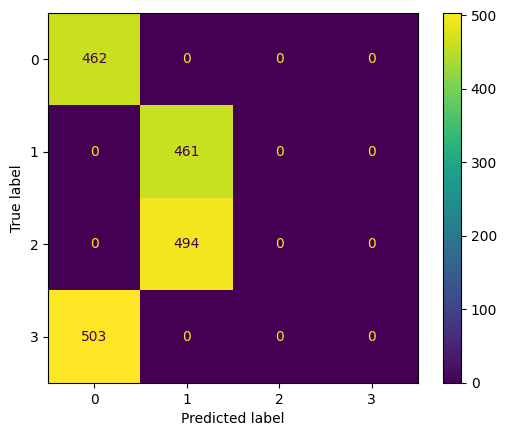

In [75]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_preds = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_preds))
ConfusionMatrixDisplay.from_predictions(y_test, ada_preds)
plt.show()


XGBoost Accuracy: 0.9708333333333333


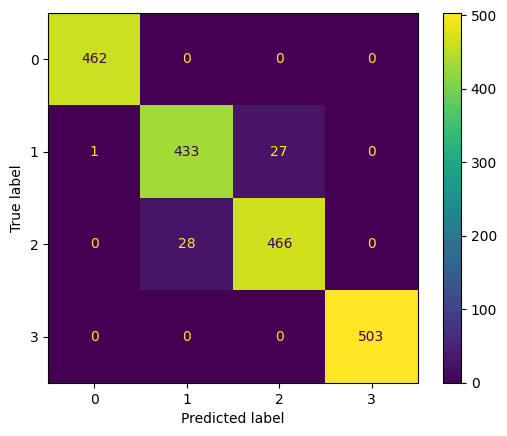

In [77]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
ConfusionMatrixDisplay.from_predictions(y_test, xgb_preds)
plt.show()

Stacking Model Accuracy: 0.9692708333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.94      0.93      0.94       461
           2       0.94      0.94      0.94       494
           3       1.00      1.00      1.00       503

    accuracy                           0.97      1920
   macro avg       0.97      0.97      0.97      1920
weighted avg       0.97      0.97      0.97      1920



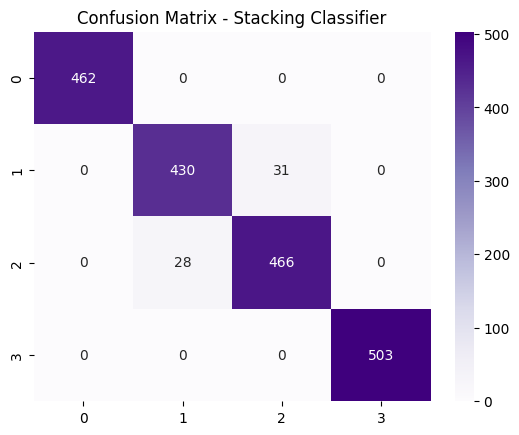

In [80]:
# Define base models
from sklearn.ensemble import StackingClassifier
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
    ('svc', SVC(probability=True, random_state=42)),  # SVC needs probability=True
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# Define meta-model (Logistic Regression)
meta_model = LogisticRegression()

# Create Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Pass original features along with predictions
)

# Train and predict
stacking_clf.fit(X_train, y_train)
stacking_preds = stacking_clf.predict(X_test)

# Evaluate
print("Stacking Model Accuracy:", accuracy_score(y_test, stacking_preds))
print(classification_report(y_test, stacking_preds))

# Confusion Matrix
stacking_matrix = confusion_matrix(y_test, stacking_preds)
sns.heatmap(stacking_matrix, annot=True, fmt='d', cmap="Purples")
plt.title("Confusion Matrix - Stacking Classifier")
plt.show()

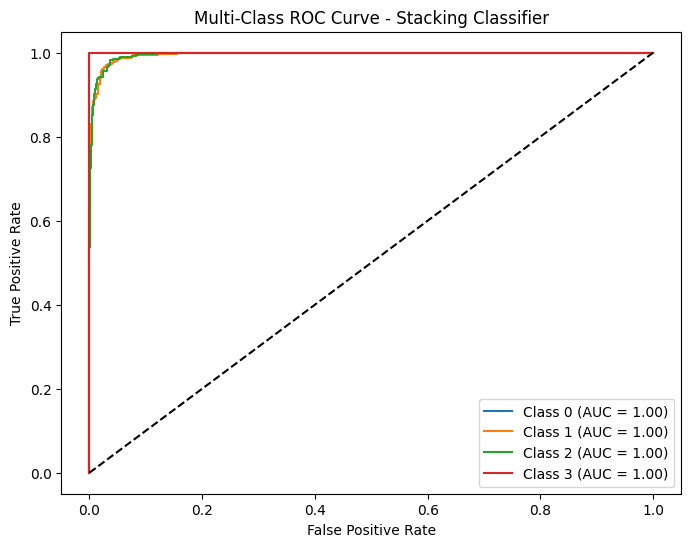

In [81]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels (One-vs-Rest for multi-class ROC)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get probability predictions from Stacking Classifier
stacking_probs = stacking_clf.predict_proba(X_test)

# Number of classes
n_classes = y_test_bin.shape[1]

# Plot ROC curve for each class
plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], stacking_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--')

# Formatting the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve - Stacking Classifier")
plt.legend(loc="lower right")
plt.show()
